In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import glob
import os
from repeats_utils import plot_salmonTE
from sequencing_tools.viz_tools import color_encoder, okabeito_palette, simpsons_palette
from plotting_utils import figure_path
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

In [2]:
TE_path = '/stor/work/Lambowitz/cdw2854/cfNA/tgirt_map/salmonTE/test*'
te_paths = glob.glob(TE_path)
res_df = map(lambda p: pd.read_csv(p + '/results.csv')\
                     .assign(samplename = os.path.basename(p)), 
             te_paths)
res_df = pd.concat(res_df)
res_df.head()

,name,class,clade,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,samplename
0,ALU,Non-LTR Retrotransposon,SINE,6258.593302,-0.292967,0.185152,-1.582304,0.113580,0.770020,test_untreated
1,AluJb,Non-LTR Retrotransposon,SINE,14070.383707,0.127810,0.146368,0.873216,0.382545,0.938800,test_untreated
2,AluJo,Non-LTR Retrotransposon,SINE,483.094763,1.217965,1.150108,1.059000,0.289600,0.938800,test_untreated
3,AluJr,Non-LTR Retrotransposon,SINE,1332.846684,-0.034381,0.148332,-0.231785,0.816705,0.998801,test_untreated
4,AluJr4,Non-LTR Retrotransposon,SINE,2189.484593,-0.039407,0.141756,-0.277994,0.781017,0.998801,test_untreated


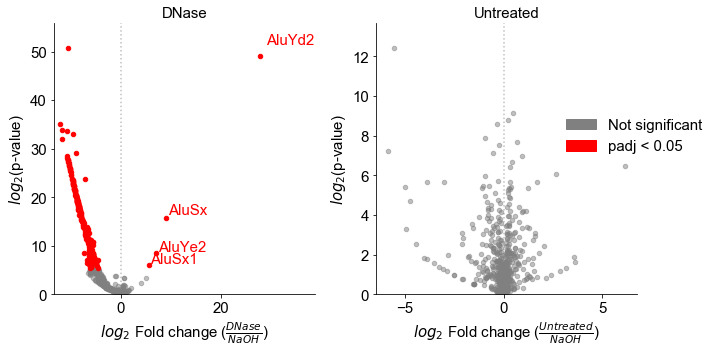

In [3]:
fig = plt.figure(figsize = (10,5))
for i, (exp, exp_df) in enumerate(res_df.groupby('samplename')):
    treatment = exp.split('_')[1].capitalize().replace('Dn','DN')
    ax = fig.add_subplot(1,2,i+1)
    plot_salmonTE(exp_df, treatment, ax)
sns.despine()
pat = [mpatches.Patch(color=col, label=lab) for col, lab in zip(['gray', 'red'], ['Not significant','padj < 0.05'])]
ax.legend(handles=pat, bbox_to_anchor = (1.3, 0.7), frameon=False, fontsize=15)
fig.tight_layout()
fig.savefig(figure_path + '/salmonTE_all.pdf')

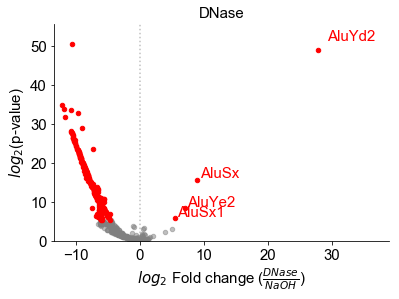

In [4]:
ax = plt.subplot()
plot_salmonTE(res_df.query('samplename=="test_dnase"'), 'DNase', ax)
sns.despine()
plt.savefig(figure_path + '/salmonTE.pdf')